In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
#Read the csv file as a DataFrame

titanic_file = pd.read_csv('train.csv')

In [4]:
#See the first 5 rows of the file

titanic_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Get a general description/number of rows where data is present in each column

titanic_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
#Question 1:  Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

#Import packages for analysis and visualization

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="ticks", color_codes=True)

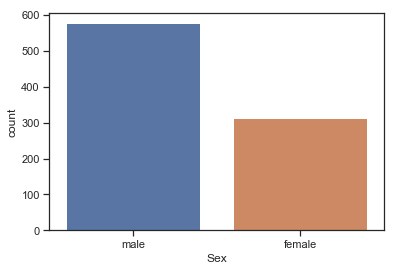

In [23]:
#Analysis of gender count of people on the ship

sns.countplot(x="Sex", data=titanic_file)

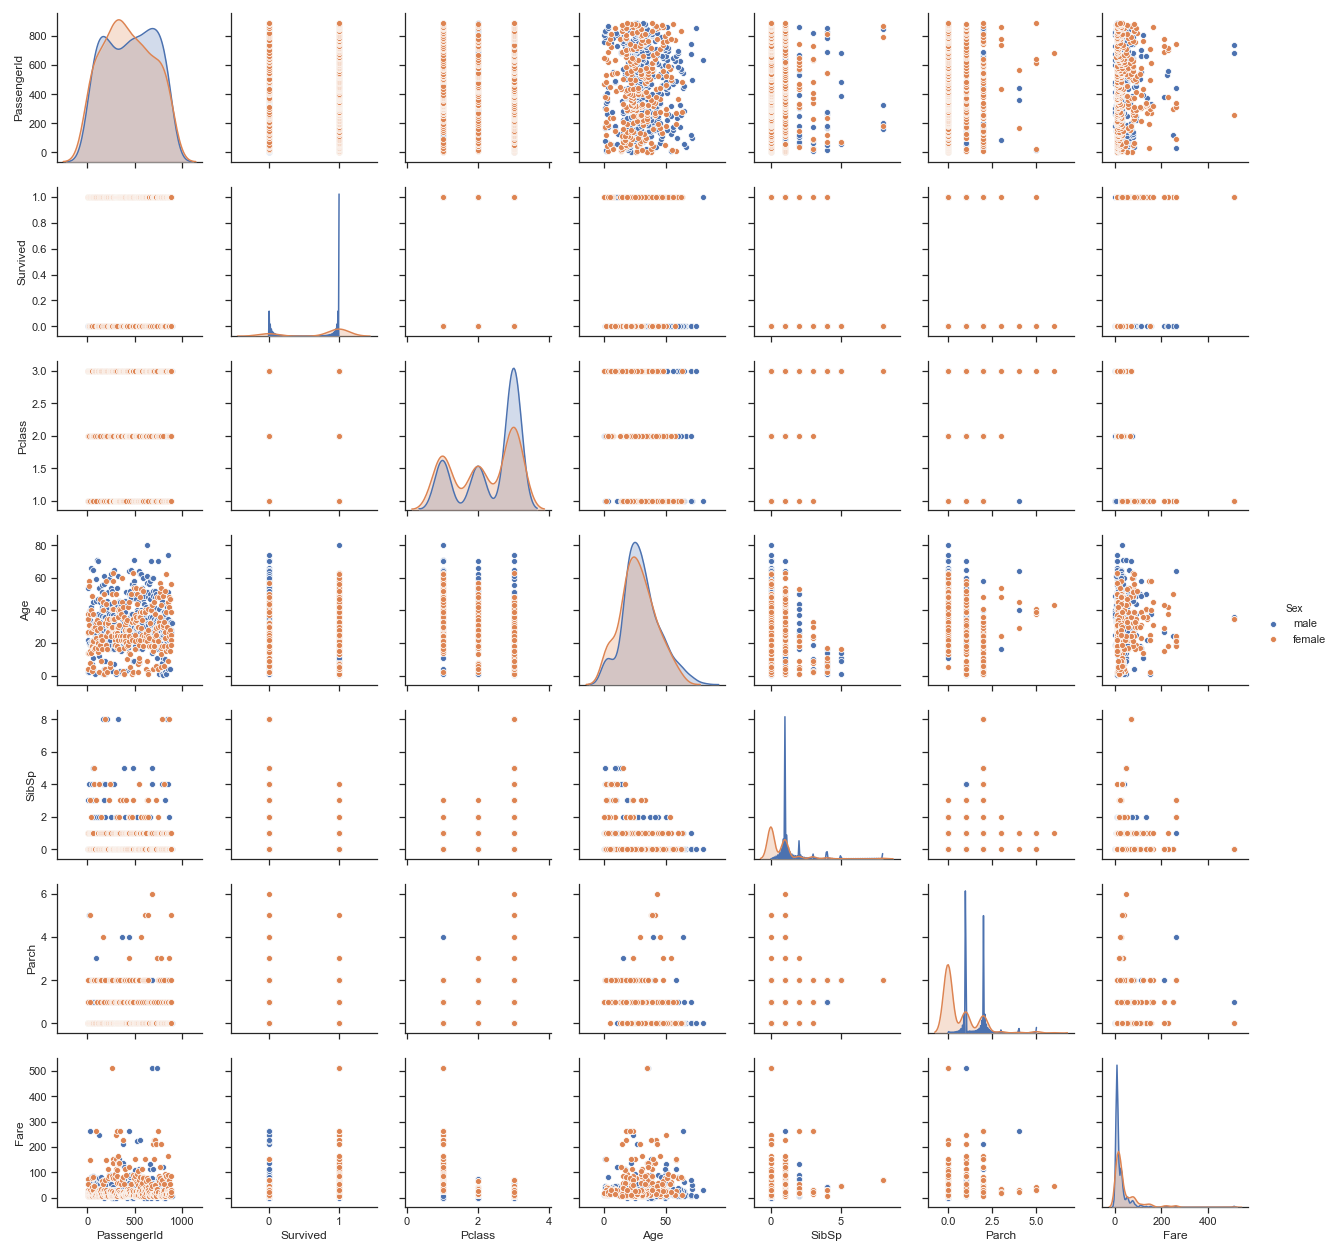

In [24]:
#Various pairplots based on gender

sns.pairplot(titanic_file, hue="Sex")

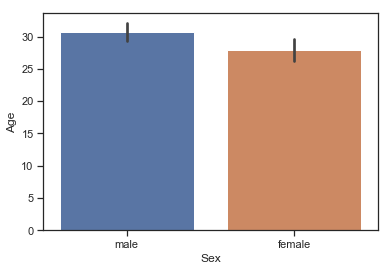

In [26]:
#Bar Graph representing mean value of age for each gender

sns.barplot(x='Sex', y='Age', data=titanic_file)

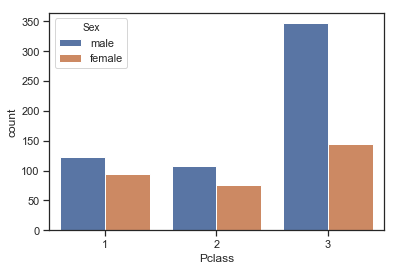

In [28]:
#Displaying count of genders in all 3 types of classes

sns.countplot(x="Pclass", data=titanic_file, hue = "Sex")

In [32]:
#Count of male, female and children

def mfc(passenger):
    Age,Sex = passenger
    if Age < 18:
        return 'child'
    else:
        return Sex

In [33]:
#Creating a new column person - applying function to Age and Sex columns

titanic_file['person'] = titanic_file[['Age','Sex']].apply(mfc,axis=1)

In [34]:
titanic_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


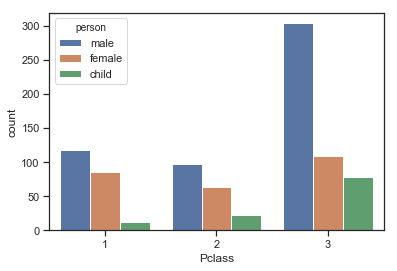

In [35]:
#Count of Male, Female and Children per class

sns.countplot(x="Pclass", data=titanic_file, hue="person")

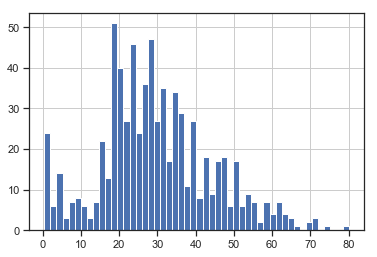

In [36]:
#Histogram plot to visualize number of people per age

titanic_file['Age'].hist(bins=50)

In [37]:
#Mean age on the ship

titanic_file['Age'].mean()

29.69911764705882

In [39]:
#Count of persons on the ship

titanic_file['person'].value_counts()

male      519
female    259
child     113
Name: person, dtype: int64

In [40]:
#Count of people in each class

titanic_file['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [41]:
#Count of cities from which people came from

titanic_file['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

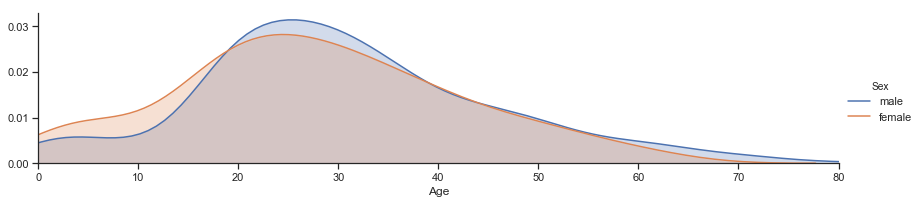

In [44]:
# Use Facetgrid to plot multiple KDEplots based on age for each gender type

figure = sns.FacetGrid(titanic_file, hue="Sex", aspect=4)
figure.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_file['Age'].max()

figure.set(xlim=(0,oldest))

figure.add_legend()

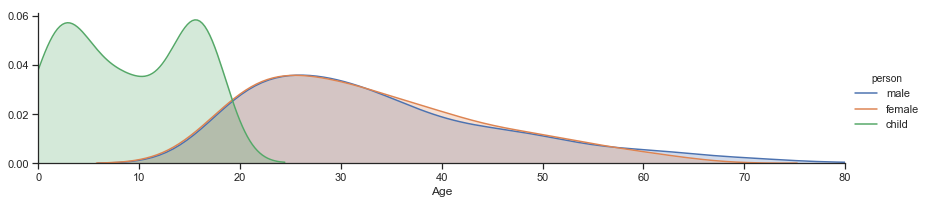

In [45]:
# Use Facetgrid to plot multiple KDEplots based on age for each person type

figure = sns.FacetGrid(titanic_file, hue="person", aspect=4)
figure.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_file['Age'].max()

figure.set(xlim=(0,oldest))

figure.add_legend()

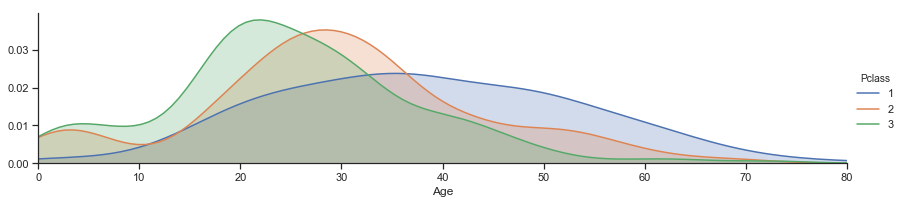

In [46]:
# Use Facetgrid to plot multiple KDEplots based on age for each class type

figure = sns.FacetGrid(titanic_file, hue="Pclass", aspect=4)
figure.map(sns.kdeplot,'Age',shade = True)

oldest = titanic_file['Age'].max()

figure.set(xlim=(0,oldest))

figure.add_legend()

In [47]:
#Question 2: What deck were the passengers on and how that relates to their class?

In [48]:
titanic_file.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [49]:
#Drop null values in cabin column

deck = titanic_file['Cabin'].dropna()

In [50]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

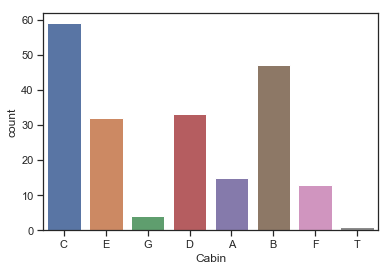

In [54]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df)

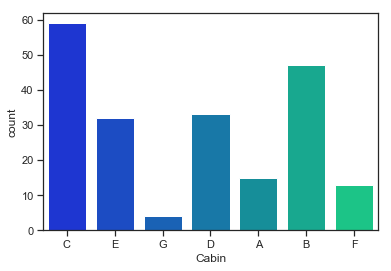

In [58]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data=cabin_df,palette='winter')

In [59]:
#Question 3: Where did the passengers come from?

In [60]:
titanic_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


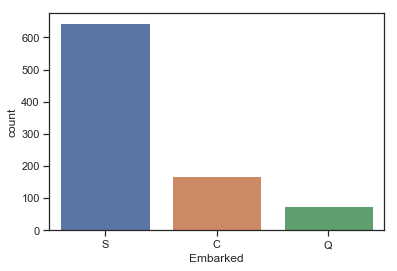

In [61]:
#Count of people coming from each cities

sns.countplot('Embarked', data = titanic_file)

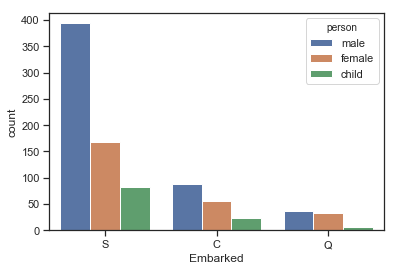

In [62]:
#Count of type of person coming from each cities

sns.countplot('Embarked', data = titanic_file, hue='person')

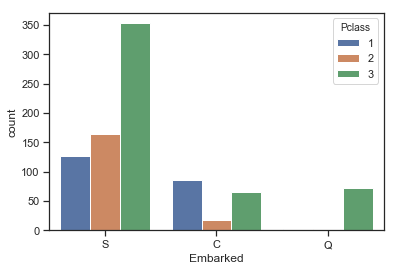

In [66]:
#Count of people in each class coming from each cities

sns.countplot('Embarked', data = titanic_file, hue='Pclass')

In [67]:
#Question 4: Who was alone and who was with family?

In [68]:
titanic_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [70]:
#Make a column to understand if the person was Alone or not

titanic_file['Alone'] = titanic_file.SibSp + titanic_file.Parch
titanic_file['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [72]:
#Set Status of person in Alone column based on values. If Value is 0, then the passenger was alone else with family

titanic_file['Alone'].loc[titanic_file['Alone'] > 0] = 'With Fam'

titanic_file['Alone'].loc[titanic_file['Alone'] == 0] = 'Alone'

C:\Users\jthak\Anaconda2\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [73]:
titanic_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Fam
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Fam
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Fam
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


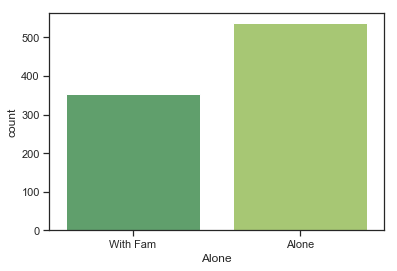

In [74]:
sns.countplot('Alone',data=titanic_file,palette='summer')

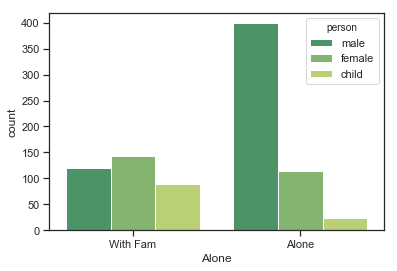

In [75]:
sns.countplot('Alone',data=titanic_file,palette='summer',hue="person")

In [76]:
#Question 5: What factors help someone survive on the ship?

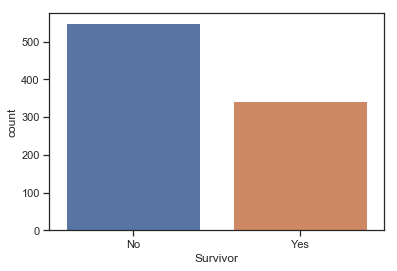

In [77]:
titanic_file['Survivor'] = titanic_file.Survived.map({0:'No',1:'Yes'})

# Let's just get a quick overall view of survied vs died. 
sns.countplot('Survivor',data=titanic_file)

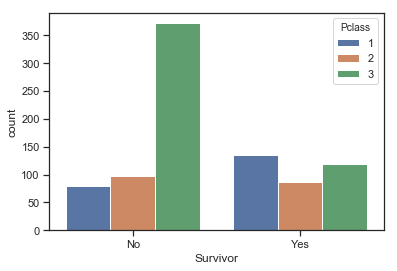

In [78]:
#Lets plot the above thing based on class

sns.countplot('Survivor',data=titanic_file,hue='Pclass')

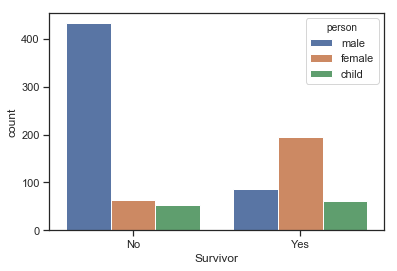

In [79]:
#Lets plot the above thing based on type of person

sns.countplot('Survivor',data=titanic_file,hue='person')

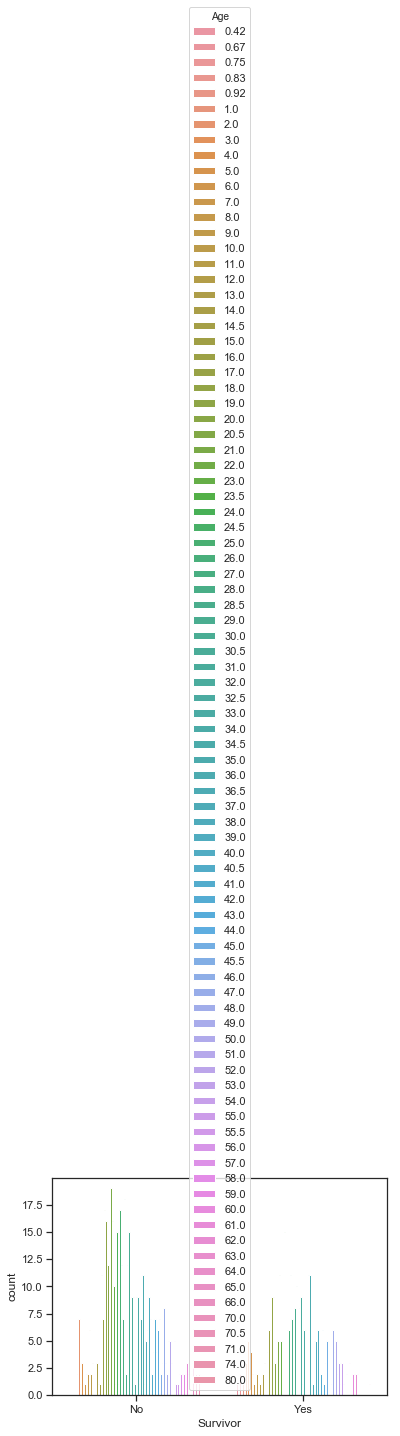

In [80]:
#Lets plot the above thing based on age

sns.countplot('Survivor',data=titanic_file,hue='Age')

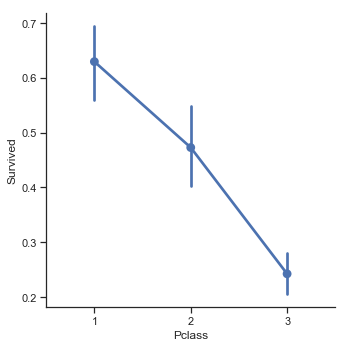

In [92]:
# Let's use a factor plot again, but now considering class

sns.factorplot(x='Pclass',y='Survived', data=titanic_file)

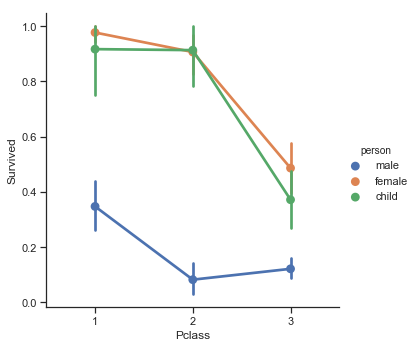

In [93]:
# Let's use a factor plot again, but now considering class and type of person

sns.factorplot(x='Pclass',y='Survived', hue='person', data=titanic_file)

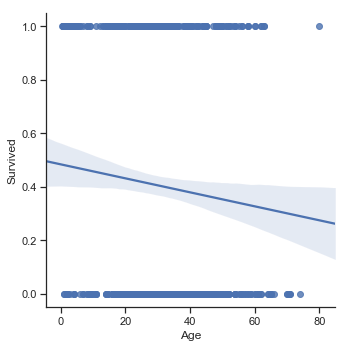

In [94]:
# Let's use a linear plot on age versus survival

sns.lmplot(x='Age',y='Survived', data= titanic_file)

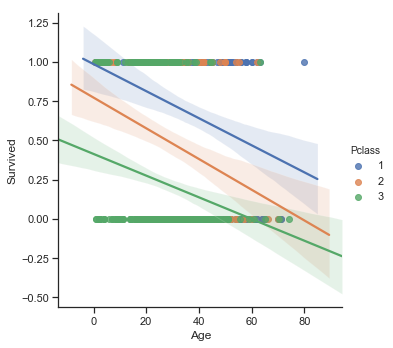

In [95]:
# Let's use a linear plot on age versus survival using hue for class seperation

sns.lmplot(x='Age',y='Survived',hue='Pclass', data= titanic_file)

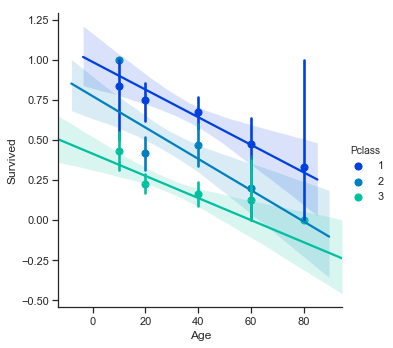

In [98]:
#Creating some age bins to clean the visualization

gen = [10,20,40,60,80]

sns.lmplot(x='Age',y='Survived',hue='Pclass', x_bins=gen, data=titanic_file, palette='winter')

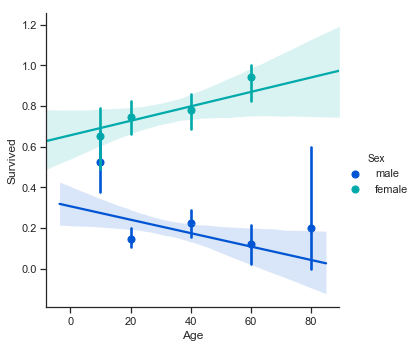

In [101]:
sns.lmplot(x='Age',y='Survived',hue='Sex', x_bins=gen, data=titanic_file, palette='winter')

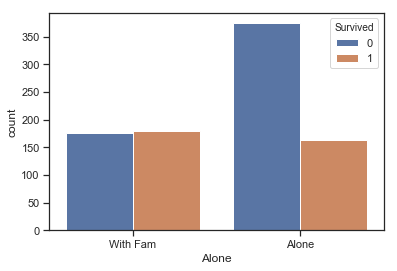

In [121]:
#Question 6: Did having a family member increase the odds of surviving the crash?

sns.countplot('Alone', hue='Survived', data=titanic_file)